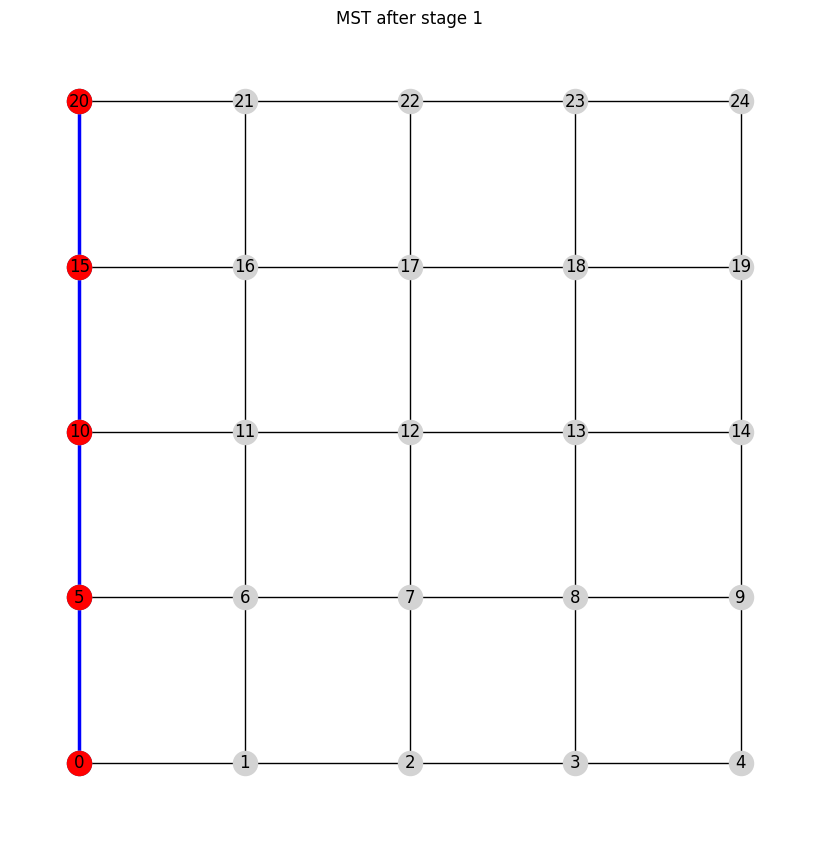

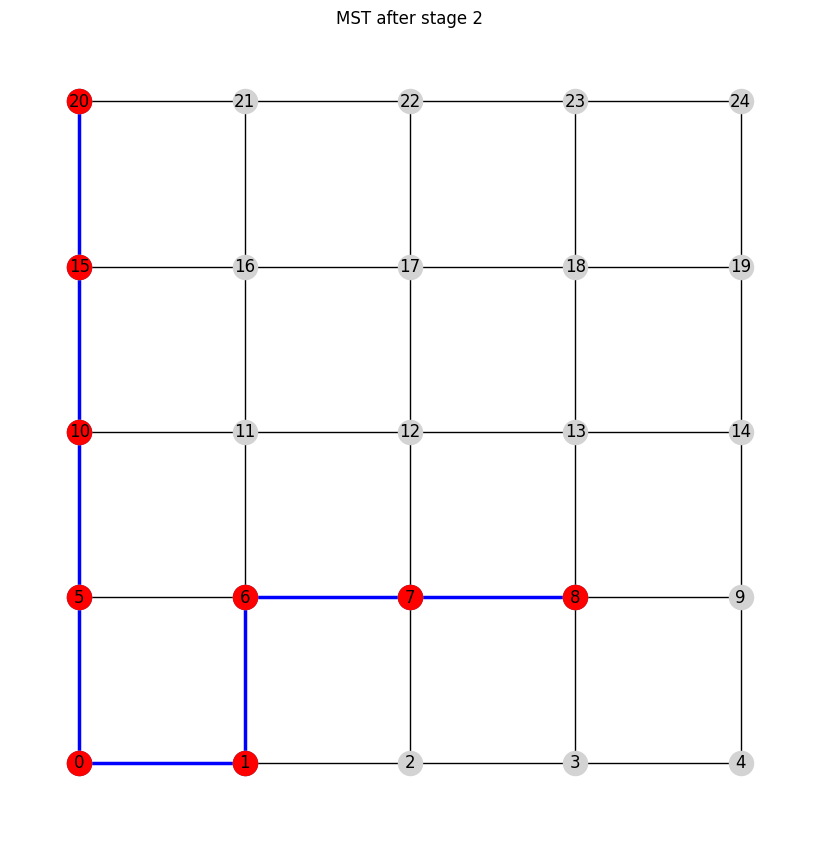

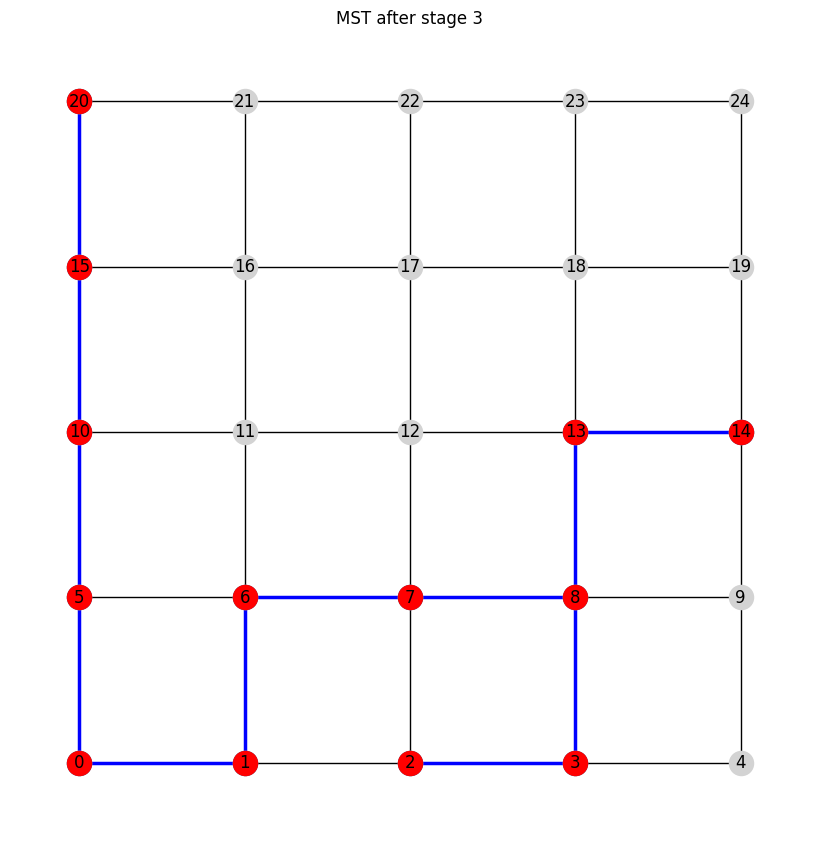

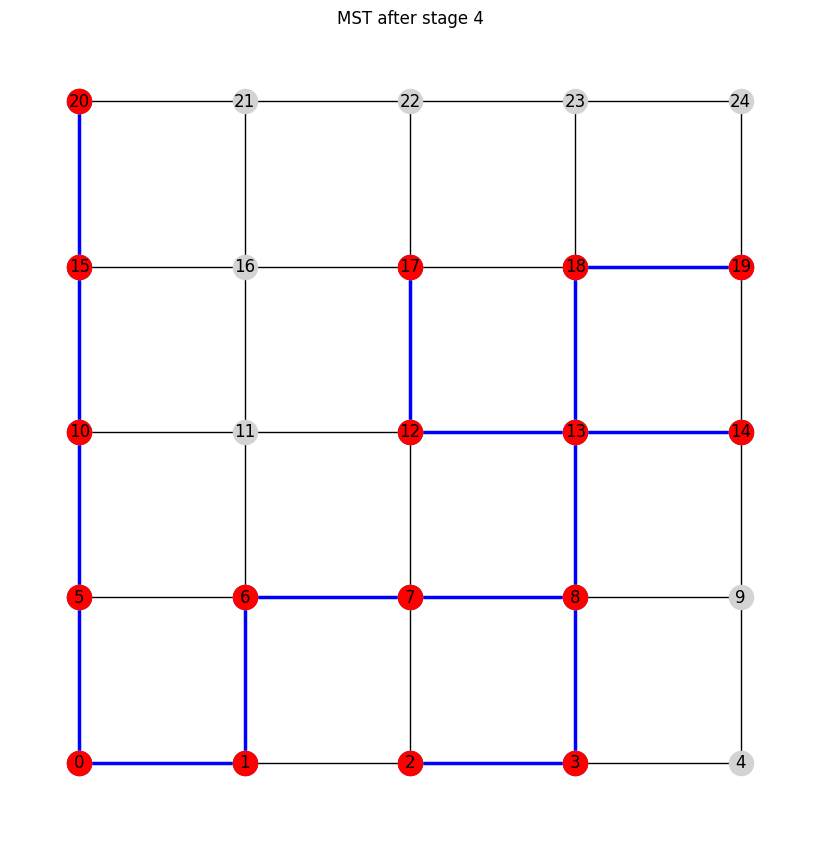

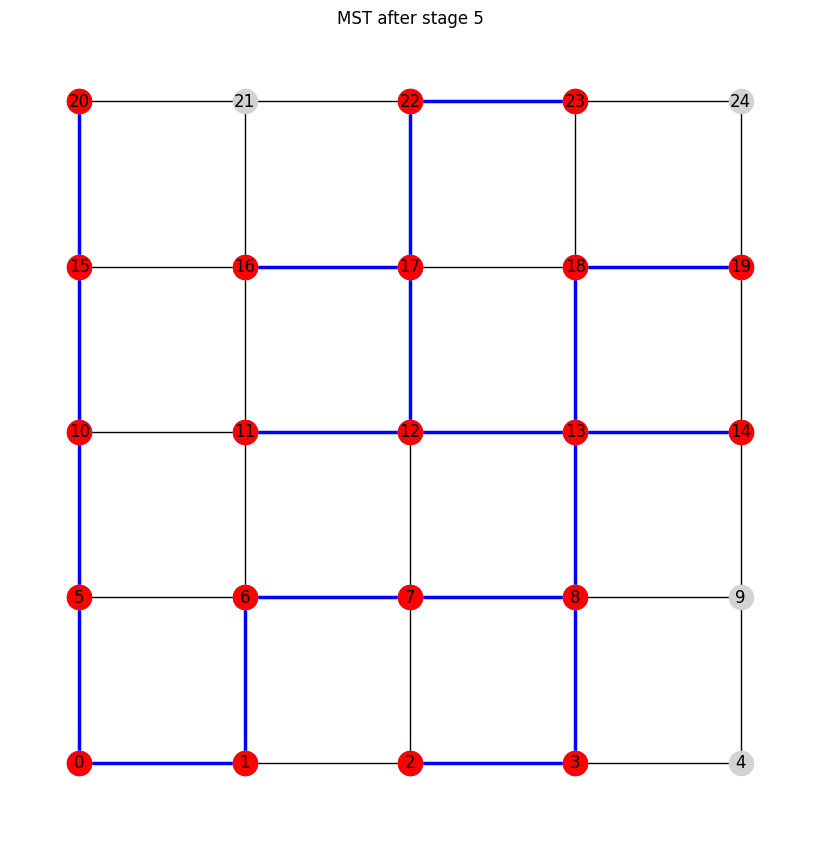

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import random

def prim_mst(graph):
    """Prim's algorithm to find the Minimum Spanning Tree (MST) of a graph."""
    # Priority queue to store edges with (weight, node1, node2)
    mst_edges = []
    visited = set()
    queue = []

    # Start from a random node
    start_node = random.choice(list(graph.nodes))
    visited.add(start_node)

    # Add all edges from the start node to the queue
    for neighbor, edge_data in graph[start_node].items():
        heapq.heappush(queue, (edge_data['weight'], start_node, neighbor))
    
    # While the MST does not include all nodes
    while len(visited) < len(graph.nodes):
        # Get the smallest edge from the priority queue
        weight, node1, node2 = heapq.heappop(queue)

        # If the node has already been visited, skip it
        if node2 in visited:
            continue
        
        # Add this edge to the MST
        mst_edges.append((node1, node2, weight))
        visited.add(node2)

        # Add all edges from the new node to the queue
        for neighbor, edge_data in graph[node2].items():
            if neighbor not in visited:
                heapq.heappush(queue, (edge_data['weight'], node2, neighbor))
    
    return mst_edges

# Function to visualize the MST
def visualize_mst(graph, mst_edges, positions, stages=5):
    """Visualize the MST in stages, showing the tree growing over time."""
    total_edges = len(mst_edges)
    edges_per_stage = max(total_edges // stages, 1)
    
    for i in range(stages):
        plt.figure(figsize=(8, 8))
        # Draw the original graph in light gray
        nx.draw(graph, pos=positions, node_color='lightgray', with_labels=True, node_size=300)
        
        # Draw the MST edges added so far
        edges_to_draw = mst_edges[:edges_per_stage * (i + 1)]
        mst_subgraph = nx.Graph()
        mst_subgraph.add_weighted_edges_from(edges_to_draw)
        nx.draw(mst_subgraph, pos=positions, edge_color='blue', width=2.5)
        
        # Draw the MST nodes
        mst_nodes = {n for edge in edges_to_draw for n in edge[:2]}
        nx.draw_networkx_nodes(graph, pos=positions, nodelist=list(mst_nodes), node_color='red', node_size=300)

        plt.title(f'MST after stage {i+1}')
        plt.show()

# Example graph and visualization setup
def main():
    # Create a random graph (you can also create a fixed one)
    G = nx.grid_2d_graph(5, 5)  # 5x5 grid graph
    G = nx.convert_node_labels_to_integers(G)  # Convert nodes to integers
    
    # Add random weights to the edges
    for (u, v) in G.edges():
        G[u][v]['weight'] = random.randint(1, 10)
    
    # Random positions for nodes (or use grid positions)
    positions = {node: (node % 5, node // 5) for node in G.nodes}
    
    # Run Prim's MST algorithm
    mst_edges = prim_mst(G)

    # Visualize the MST growing in stages
    visualize_mst(G, mst_edges, positions, stages=5)

if __name__ == '__main__':
    main()
